In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../logs/XK00.csv')
df.head()
#df.shape

,balancing,balancing.1,balancing.2,battery,battery.1,battery.2,battery.3,battery.4,grid,grid.1,...,balance,balance.1,balance.2,balance.3,balance.4,balance.5,balance.6,balance.7,balance.8,balance.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,loss_load,overgeneration,reward,charge_amount,current_charge,discharge_amount,reward,soc,co2_per_kwh_current,co2_production,...,reward,shaped_reward,overall_provided_to_microgrid,overall_absorbed_from_microgrid,flex_provided_to_microgrid,flex_absorbed_from_microgrid,controllable_provided_to_microgrid,controllable_absorbed_from_microgrid,fixed_provided_to_microgrid,fixed_absorbed_from_microgrid
2,0.0,0.0,-0.0,0.0,11648.35,720.0,-0.0,0.5,999.0,-0.0,...,0.0,0.0,720.0,720,0.0,0,720.0,0,0.0,720
3,0.0,0.0,-0.0,0.0,10848.35,858.0,-0.0,0.4656603724991093,999.0,-0.0,...,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858
4,0.0,0.0,-0.0,0.0,9895.016666666666,858.0,-0.0,0.4247389830605479,999.0,-0.0,...,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858


In [3]:
df.columns

Index(['balancing', 'balancing.1', 'balancing.2', 'battery', 'battery.1',
       'battery.2', 'battery.3', 'battery.4', 'grid', 'grid.1', 'grid.2',
       'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7', 'node', 'node.1',
       'node.2', 'node.3', 'node.4', 'node.5', 'node.6', 'node.7', 'node.8',
       'node.9', 'node.10', 'node.11', 'node.12', 'node.13', 'node.14',
       'node.15', 'node.16', 'node.17', 'pv_source', 'pv_source.1',
       'pv_source.2', 'pv_source.3', 'balance', 'balance.1', 'balance.2',
       'balance.3', 'balance.4', 'balance.5', 'balance.6', 'balance.7',
       'balance.8', 'balance.9'],
      dtype='object')

In [4]:
df_battery = df[['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']]
df_battery.drop([0])
#df_battery.head()


,battery,battery.1,battery.2,battery.3,battery.4
1,charge_amount,current_charge,discharge_amount,reward,soc
2,0.0,11648.35,720.0,-0.0,0.5
3,0.0,10848.35,858.0,-0.0,0.4656603724991093
4,0.0,9895.016666666666,858.0,-0.0,0.4247389830605479
5,0.0,8941.683333333332,858.0,-0.0,0.3838175936219865
6,0.0,7988.349999999999,858.0,-0.0,0.3428962041834251
7,0.0,7035.016666666666,720.0,-0.0,0.3019748147448637
8,0.0,6235.016666666666,720.0,-0.0,0.267635187243973


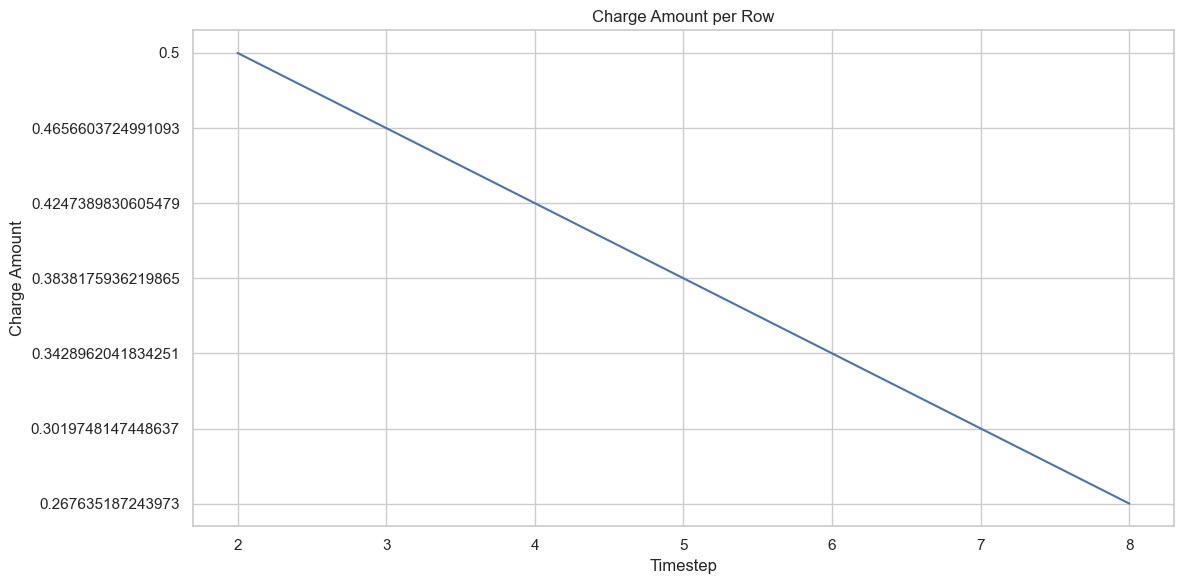

In [5]:
df_battery_plot = df_battery.drop([0,1])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_battery_plot.index, y=df_battery_plot['battery.4'])

plt.xlabel("Timestep")
plt.ylabel("Charge Amount")
plt.title("Charge Amount per Row")
plt.tight_layout()
plt.show()

In [6]:
#df_node = df[['node', 'node.1', 'node.2', 'node.3', 'node.4', 'node.5', 'node.6', 'node.7', 'node.8', 'node.9', 'node.10', 'node.11', 'node.12', 'node.13', 'node.14', 'node.15', 'node.16', 'node.17']]
df_node = df[['node', 'node.1', 'node.2']]
df_node.drop([0])
#df_node.tail(1)

,node,node.1,node.2
1,load_met,node_current,reward
2,120,-2.180035404622427,0.0
3,258,-52.30459792631374,0.0
4,258,-50.27149714575637,0.0
5,258,-46.112753049590395,0.0
6,258,-29.279653507227707,0.0
7,120,-41.90964129476695,0.0
8,120,-47.88746425127869,0.0


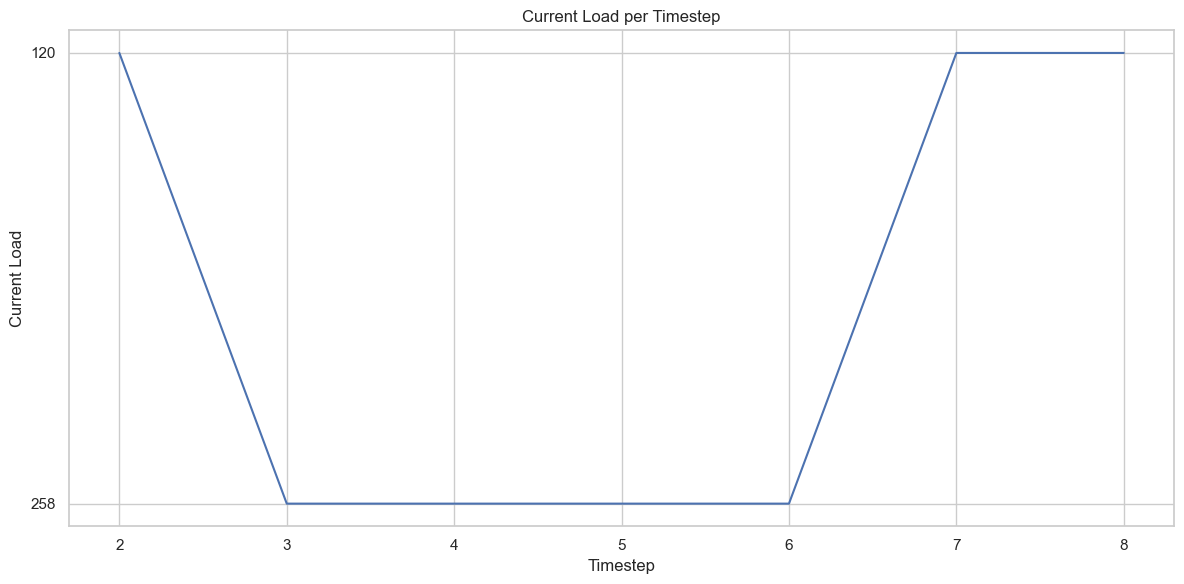

In [7]:
df_node_plot = df_node.iloc[2:]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_node_plot.index, y=df_node_plot['node'])

plt.xlabel("Timestep")
plt.ylabel("Current Load")
plt.title("Current Load per Timestep")
plt.tight_layout()
plt.show()

In [8]:
df_grid = df[['grid', 'grid.1', 'grid.2', 'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7']]
df_grid.drop([0])

,grid,grid.1,grid.2,grid.3,grid.4,grid.5,grid.6,grid.7
1,co2_per_kwh_current,co2_production,export_price_current,grid_export,grid_import,grid_status_current,import_price_current,reward
2,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
3,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
4,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
5,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
6,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
7,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0
8,999.0,-0.0,0.0008757038586030666,0.0,-0.0,1.0,0.0009730042873367406,0.0


In [9]:
df_pv_source = df[['pv_source', 'pv_source.1', 'pv_source.2', 'pv_source.3']]
df_pv_source.drop([0])

,pv_source,pv_source.1,pv_source.2,pv_source.3
1,curtailment,renewable_current,renewable_used,reward
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0


In [10]:
df_balancing = df[['balancing', 'balancing.1', 'balancing.2']]
df_balancing.drop([0])

,balancing,balancing.1,balancing.2
1,loss_load,overgeneration,reward
2,0.0,0.0,-0.0
3,0.0,0.0,-0.0
4,0.0,0.0,-0.0
5,0.0,0.0,-0.0
6,0.0,0.0,-0.0
7,0.0,0.0,-0.0
8,0.0,0.0,-0.0


In [11]:

df_balance = df[['balance', 'balance.1', 'balance.2', 'balance.3', 'balance.4', 'balance.5', 'balance.6', 'balance.7', 'balance.8', 'balance.9']]
df_balance.drop([0])

,balance,balance.1,balance.2,balance.3,balance.4,balance.5,balance.6,balance.7,balance.8,balance.9
1,reward,shaped_reward,overall_provided_to_microgrid,overall_absorbed_from_microgrid,flex_provided_to_microgrid,flex_absorbed_from_microgrid,controllable_provided_to_microgrid,controllable_absorbed_from_microgrid,fixed_provided_to_microgrid,fixed_absorbed_from_microgrid
2,0.0,0.0,720.0,720,0.0,0,720.0,0,0.0,720
3,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858
4,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858
5,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858
6,0.0,0.0,858.0,858,0.0,0,858.0,0,0.0,858
7,0.0,0.0,720.0,720,0.0,0,720.0,0,0.0,720
8,0.0,0.0,720.0,720,0.0,0,720.0,0,0.0,720
